Топ библиотек для визуализации на Python:



*   Matplotlib
*   Seaborn
*   Plotly
*   Bokeh
*   Folium




In [ ]:
#нужна регистрация на кагле, чтобы качать данные сразу в колаб, скачать оттуда файл kaggle.json
!pip install kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()#выбор и загрузка файла

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anvyss","key":"bb787a603c8c4d31896ff7fd855cadb7"}'}

In [ ]:
!mkdir ~/.kaggle #создание папки
!cp kaggle.json ~/.kaggle #копия этого файла в эту папку

In [ ]:
#даем права доступа к этому файлу
#изменение прав доступа на 600, то есть чтение и запись для владельца
# и ничего для отсальных
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#загрузит данные в виде архива
!kaggle datasets download 'kritirathi/indian-food-dataset-with'

  0% 0.00/13.5k [00:00<?, ?B/s]
100% 13.5k/13.5k [00:00<00:00, 34.9MB/s]


In [ ]:
!unzip indian-food-dataset-with.zip

Archive:  indian-food-dataset-with.zip
  inflating: Ifood_new.csv           


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Ifood_new.csv')

In [ ]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,img_url
0,Adhirasam,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian,10,50,sweet,dessert,West Bengal,East,https://www.crazymasalafood.com/wp-content/ima...
1,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
2,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5,40,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
3,Aloo methi,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,10,40,bitter,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
4,Aloo shimla mirch,"Potato, shimla mirch, garam masala, amchur pow...",vegetarian,10,40,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...


# Matplotlib
https://matplotlib.org/

Cамая популярная библиотека Python для визуализации данных.

Matplotlib может создать любой график, но с его помощью может быть сложно построить сложные графики, чтобы они выглядели презентабельно, есть библиотеки, которые с этим справляются лучше.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
print(matplotlib.__version__)

3.7.1


In [ ]:
a = [1,2,3,4,5]
b = [2,4,7,1,8]

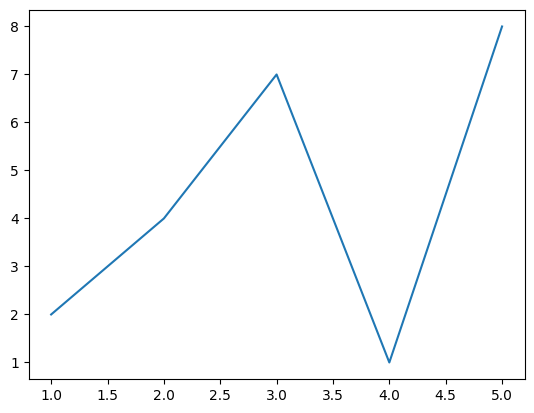

In [ ]:
plt.plot(a,b)
plt.show()

In [ ]:
course = data.course.value_counts()
course

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

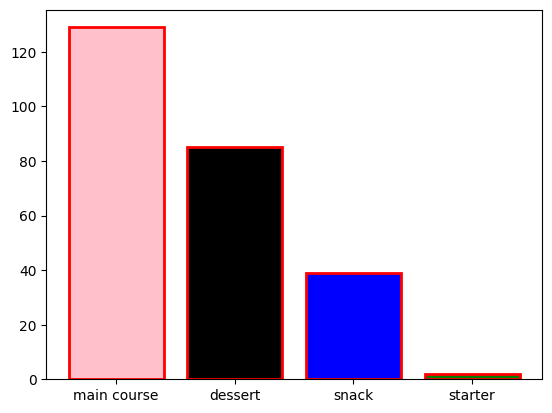

In [ ]:
plt.bar(course.index,course.values, color = ['pink','black','blue','green'],edgecolor = 'red',linewidth = 2)
plt.show()

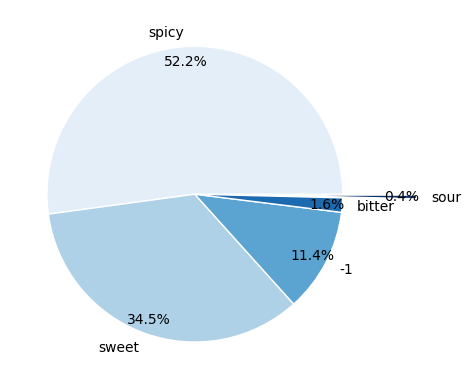

In [ ]:
flavor_profile = data.flavor_profile.value_counts()

colors = plt.get_cmap('Blues')(np.linspace(0.1, 1, len(flavor_profile)))

plt.pie(flavor_profile, radius=1, colors = colors, labels = flavor_profile.index,  autopct='%1.1f%%',
        pctdistance=(0.9), explode = (0,0,0,0,0.5),
       wedgeprops={"linewidth": 1, "edgecolor": "white"})
plt.show()

In [ ]:
data.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


array([[<Axes: title={'center': 'prep_time'}>,
        <Axes: title={'center': 'cook_time'}>]], dtype=object)

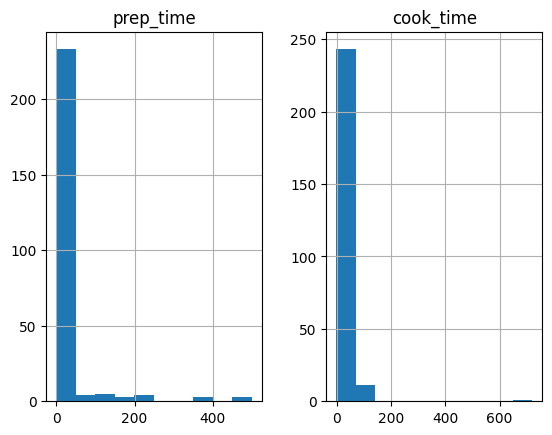

In [ ]:
data.hist()

(array([ 87., 123.,  33.,   8.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ -1.        ,  23.03333333,  47.06666667,  71.1       ,
         95.13333333, 119.16666667, 143.2       , 167.23333333,
        191.26666667, 215.3       , 239.33333333, 263.36666667,
        287.4       , 311.43333333, 335.46666667, 359.5       ,
        383.53333333, 407.56666667, 431.6       , 455.63333333,
        479.66666667, 503.7       , 527.73333333, 551.76666667,
        575.8       , 599.83333333, 623.86666667, 647.9       ,
        671.93333333, 695.96666667, 720.        ]),
 <BarContainer object of 30 artists>)

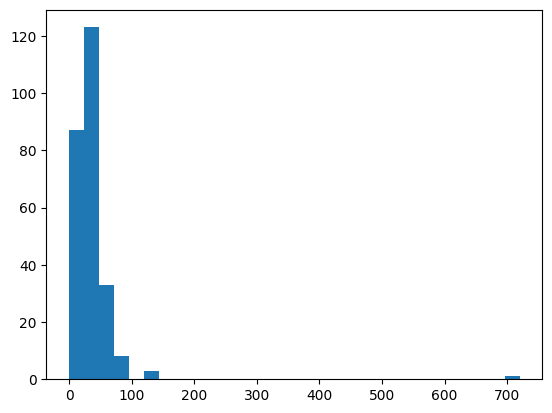

In [ ]:
plt.hist(data.cook_time, bins = 30)

In [ ]:
courses = data.groupby('course').flavor_profile.value_counts()

In [ ]:
courses

course       flavor_profile
dessert      sweet             85
main course  spicy             96
             -1                26
             bitter             3
             sweet              3
             sour               1
snack        spicy             35
             -1                 3
             bitter             1
starter      spicy              2
Name: flavor_profile, dtype: int64

# Seaborn
https://seaborn.pydata.org/

Библиотека Python для визуализации данных, построенная на базе Matplotlib. Она более высокоуровневая, что упрощает ее использование.

Требует меньше написания кода для отрисовки более сложных графиков. Другими словами, seaborn обычно строит графики, аналогичные matplotlib, но с меньшим количеством кода и более красивым дизайном.


Seaborn более ограничен и не имеет такой широкой коллекции графиков, как matplotlib, но все равно активно используется.

In [ ]:
import seaborn as sns

Диаграммы рассеяния, показывающие положительные линейные отношения (когда x увеличивается, увеличивается y), либо отрицательные (когда x увеличивается, y уменьшается).

Гистограммы в диагональных прямоугольниках, показывающие распределение конкретных признаков.

<Axes: >

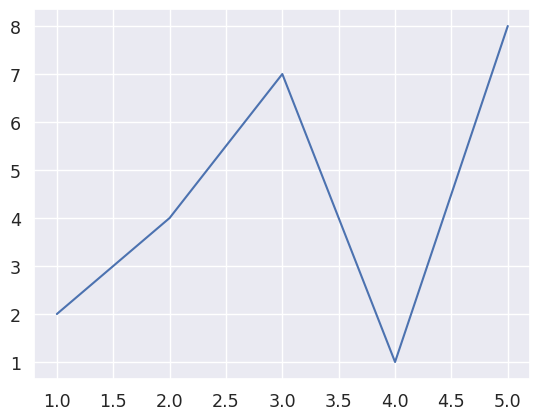

In [ ]:
sns.lineplot(x=a,y=b)

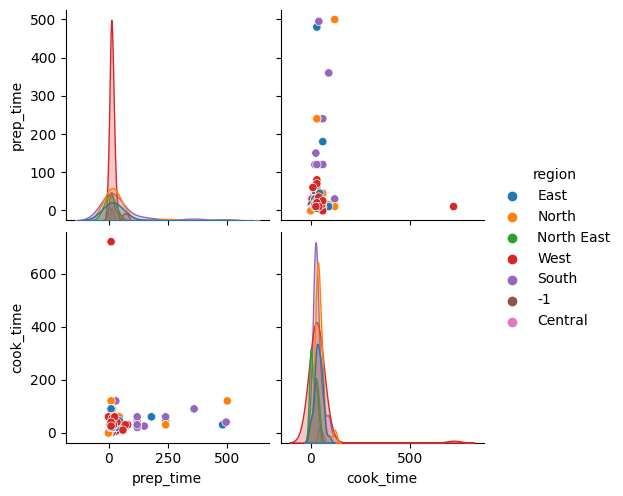

In [ ]:
sns.pairplot(data,
    hue='region'); # в hue можно указать категориальный признак

In [ ]:
data.corr()

<ipython-input-51-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,prep_time,cook_time
prep_time,1.000000,0.144113
cook_time,0.144113,1.000000


<ipython-input-59-ece35db00344>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(),


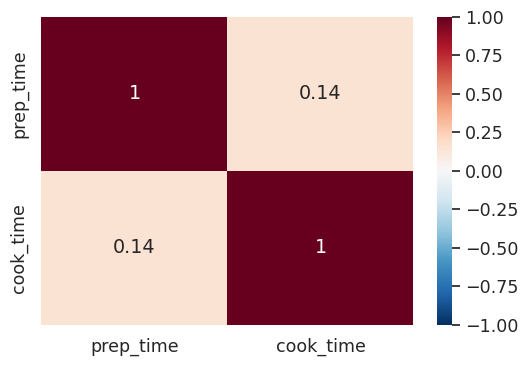

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(
    data.corr(),
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1); # указывает начало цветовых кодов от -1 до 1.

<Axes: >

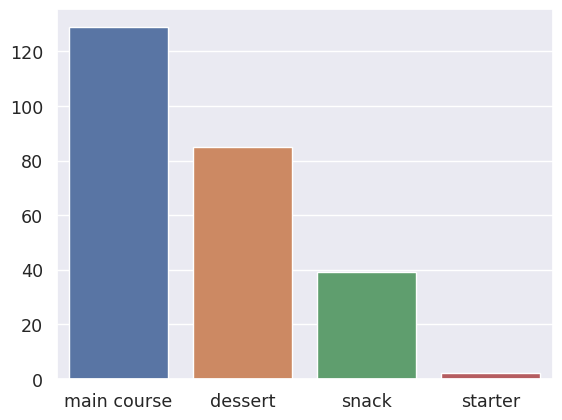

In [ ]:
sns.barplot(x=course.index, y=course.values)

In [ ]:
print(courses.index)
print(courses.index.get_level_values(0))
print(courses.index.get_level_values(1))
print(courses.values)

MultiIndex([(    'dessert',  'sweet'),
            ('main course',  'spicy'),
            ('main course',     '-1'),
            ('main course', 'bitter'),
            ('main course',  'sweet'),
            ('main course',   'sour'),
            (      'snack',  'spicy'),
            (      'snack',     '-1'),
            (      'snack', 'bitter'),
            (    'starter',  'spicy')],
           names=['course', 'flavor_profile'])
Index(['dessert', 'main course', 'main course', 'main course', 'main course',
       'main course', 'snack', 'snack', 'snack', 'starter'],
      dtype='object', name='course')
Index(['sweet', 'spicy', '-1', 'bitter', 'sweet', 'sour', 'spicy', '-1',
       'bitter', 'spicy'],
      dtype='object', name='flavor_profile')
[85 96 26  3  3  1 35  3  1  2]
10


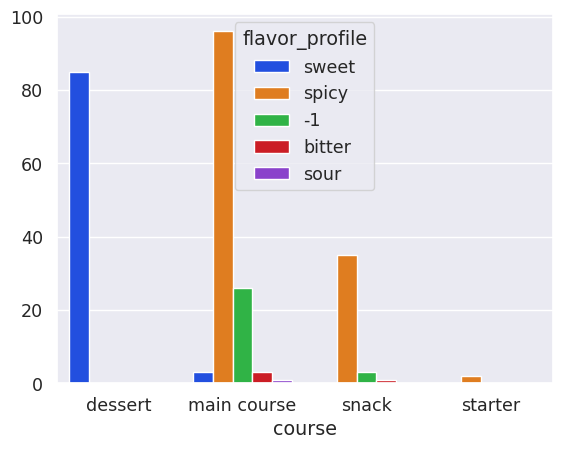

In [ ]:
sns.barplot(
    x=courses.index.get_level_values(0), #ось х
    y=courses.values, #ось y
    palette='bright', #расцветка
    hue=courses.index.get_level_values(1)); #категориальный признак

<Axes: xlabel='prep_time', ylabel='Count'>

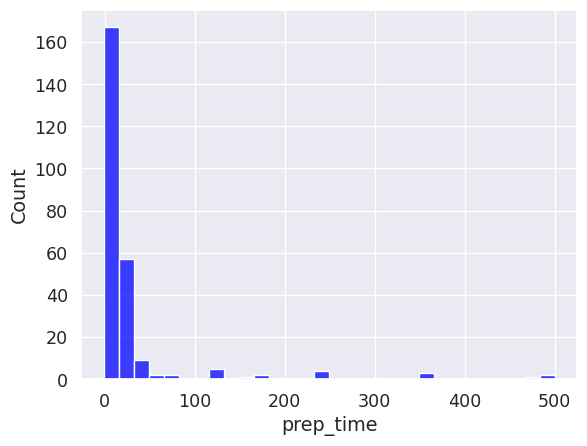

In [ ]:
sns.histplot(data.prep_time,color='blue', bins=30)

<Axes: >

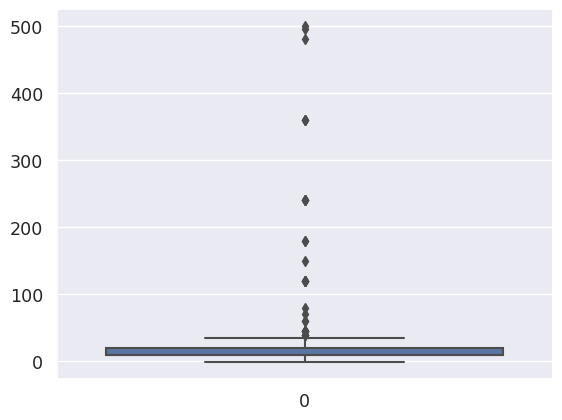

In [ ]:
sns.boxplot(data.prep_time)

# Plotly
https://plotly.com/python/

Plotly упрощает создание интерактивных графиков. Можно создавать дашборды.

Есть Plotly, а есть Plotly Exspress


In [ ]:
#содержит объекты (рисунок, макет, данные и графики, такие как: диаграмма рассеяния, линейный график и т.д.),
#которые отвечают за создание графиков.
import plotly.graph_objs as go

#модуль plotly.express может создать весь рисунок за один раз.
#Он автоматически использует graph_objects и возвращает graph_objects.
import plotly.express as px


In [ ]:
fig = px.line(x=a, y=b, title='График', width=500, height=500, markers=True)
fig.show()

In [ ]:
fig = px.bar(x=course.index, y=course.values, width=800, height=500,color=course.index, text_auto=True)
fig.show()

In [ ]:
fig = px.pie(values=course.values, names=course.index, title='Круговая диаграмма')
fig.show()

In [ ]:
fig = px.treemap(path=[px.Constant(courses.index.get_level_values(0)), courses.index.get_level_values(1)], values=courses.values,
                  color=courses.index.get_level_values(1))
fig.show()

In [ ]:
fig = px.bar(x=courses.index.get_level_values(0), y=courses.values,color = courses.index.get_level_values(1),
             text_auto = True, width=700,height=600)
fig.show()

In [ ]:
fig = px.histogram(data, x=data.prep_time, color = 'course', nbins = 100)
fig.show()

In [ ]:
df = px.data.carshare()
fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon", color="peak_hour", size="car_hours",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  mapbox_style="carto-positron")
fig.show()

Пример взятия производной от функции и график

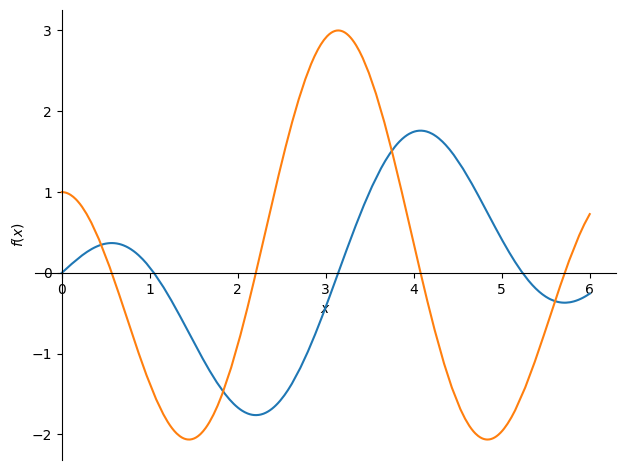

In [ ]:
from sympy import *
from sympy.plotting import plot

x = Symbol('x')
y = sin(2*x) - sin(x)
dy = y.diff(x)
plot(y,dy, (x, 0, 6))